# STEP 0: Use GPU

In [ ]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()


True

In [ ]:
# Show the GPU info

!nvidia-smi


Thu Nov 25 09:47:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    31W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# STEP 1: Git clone your project

In [ ]:
# Git clone your project
!rm -rf VRDL_project2
!git clone https://github.com/RodyCoco/VRDL_project2.git


Cloning into 'VRDL_project2'...
remote: Enumerating objects: 224, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 224 (delta 67), reused 96 (delta 10), pack-reused 0
Receiving objects: 100% (224/224), 242.44 KiB | 3.28 MiB/s, done.
Resolving deltas: 100% (67/67), done.


# STEP 2: Install your requirements

In [ ]:
!pip install -r /content/VRDL_project2/requirements.txt
!pip install googledrivedownloader
!pip install shutil

     |████████████████████████████████| 132 kB 5.3 MB/s 
     |████████████████████████████████| 155 kB 37.5 MB/s 
     |████████████████████████████████| 3.9 MB 36.0 MB/s 
     |████████████████████████████████| 61 kB 7.2 MB/s 
     |████████████████████████████████| 788 kB 39.2 MB/s 
     |████████████████████████████████| 1.4 MB 35.4 MB/s 
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 10.3 MB 36.0 MB/s 
     |████████████████████████████████| 15.7 MB 37.1 MB/s 
     |████████████████████████████████| 60.3 MB 55 kB/s 
     |████████████████████████████████| 11.3 MB 42.7 MB/s 
     |████████████████████████████████| 3.1 MB 31.9 MB/s 
     |████████████████████████████████| 374 kB 36.1 MB/s 
     |████████████████████████████████| 1.1 MB 35.3 MB/s 
     |████████████████████████████████| 1.0 MB 45.7 MB/s 
     |████████████████████████████████| 96 kB 5.9 MB/s 
     |████████████████████████████████| 503 kB 46.9 MB/s 
     |█████████████

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [ ]:
# Import your package and check the version

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())


# You must import the below 5 packages 
import os
import cv2
import time
import shutil
from tqdm import tqdm
from google_drive_downloader import GoogleDriveDownloader as gdd

1.10.0+cu111 True


# STEP 3: Wget testing data 

In [ ]:
# 1. Download the testing data
gdd.download_file_from_google_drive(file_id='1Fm-avdeNgzhPxhvia0iw9yZzcoOggy7I',
                                    dest_path='./test.zip',
                                    unzip=True)

# 2. Read the image_name and put them into the list
# You need to modify the path to fit your test_folder
if os.path.exists("/content/VRDL_project2/my_dataset/images/test"):
  shutil.rmtree("/content/VRDL_project2/my_dataset/images/test")
shutil.copytree("test", "/content/VRDL_project2/my_dataset/images/test", symlinks=False, ignore=None, \
                copy_function=shutil.copy2, ignore_dangling_symlinks=False)



'/content/VRDL_project2/my_dataset/images/test'

# STEP 4: Run inferene and bench mark

In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/drive')

# 1. Copy weights from google drive
weight_path = '/content/drive/MyDrive/VRDL_project2/weights.pt'
shutil.copyfile(weight_path, "VRDL_project2/my_yolov3/weights/weights.pt")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'VRDL_project2/my_yolov3/weights/weights.pt'

### Please **screenshot** this cell, including the code and the output (your inference time), and put it into your report.

In [28]:
from VRDL_project2.my_yolov3.detect import run

TEST_IMAGE_NUMBER = 100 # This number is fixed.
test_img_list = []
# Read image (Be careful with the image order)
data_listdir = os.listdir("test")
data_listdir.sort(key = lambda x: int(x[:-4]))

if not os.path.exists("/content/VRDL_project2/my_dataset/images/test_100_images"):
  os.mkdir("/content/VRDL_project2/my_dataset/images/test_100_images")

for img_name in data_listdir[:TEST_IMAGE_NUMBER]:
  shutil.copyfile(f"/content/VRDL_project2/my_dataset/images/test/{img_name}",\
          f"/content/VRDL_project2/my_dataset/images/test_100_images/{img_name}")

start_time = time.time()
# your model prediction
pred = run(weights = "/content/VRDL_project2/my_yolov3/weights/weights.pt",
    source = "/content/VRDL_project2/my_dataset/images/test_100_images",
    imgsz = [320, 320],
    conf_thres = 0.05,
    iou_thres = 0.8,
    max_det = 4,
    device = "0",# the same as device='cuda:0'
    view_img = False,
    save_txt = True,
    save_conf = True,
    save_crop = False,
    nosave = False,
    classes = None,
    agnostic_nms = False,
    augment = False,
    visualize = False,
    update = False,
    project = "runs/detect",
    name = "test",
    exist_ok = False,
    line_thickness = 3,
    hide_labels = False,
    hide_conf = False,
    half = False,
    dnn = False,
    )
end_time  = time.time()
print("\nInference time per image: ", (end_time - start_time) / TEST_IMAGE_NUMBER)
print("100 images result:\n",pred)
# Remember to screenshot!

YOLOv3 🚀 7c73d53 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61545895 parameters, 0 gradients, 154.9 GFLOPs



Inference time per image:  0.06922886610031127
100 images result:
 {'1005.png': [{'image_id': 1005, 'bbox': [86, 47, 22, 36], 'score': 0.16440680623054504, 'category_id': 2}, {'image_id': 1005, 'bbox': [84, 43, 27, 37], 'score': 0.16464835405349731, 'category_id': 2}, {'image_id': 1005, 'bbox': [87, 47, 22, 32], 'score': 0.7320285439491272, 'category_id': 2}, {'image_id': 1005, 'bbox': [110, 46, 22, 32], 'score': 0.7442527413368225, 'category_id': 4}], '1056.png': [{'image_id': 1056, 'bbox': [10, 4, 7, 16], 'score': 0.0822889432311058, 'category_id': 1}, {'image_id': 1056, 'bbox': [12, 4, 7, 16], 'score': 0.2335098534822464, 'category_id': 1}, {'image_id': 1056, 'bbox': [11, 4, 7, 16], 'score': 0.6914543509483337, 'category_id': 1}, {'image_id': 1056, 'bbox': [19, 4, 10, 16], 'score': 0.7429587841033936, 'category_id': 2}], '1075.png': [{'image_id': 1075, 'bbox': [134, 27, 23, 36], 'score': 0.07333087176084518, 'category_id': 6}, {'image_id': 1075, 'bbox': [136, 26, 18, 33], 'score': 

# STEP 5: Generate answer.json for submission on Codalab
The answer.json has the same format as [COCO dataset results](https://cocodataset.org/#format-results)

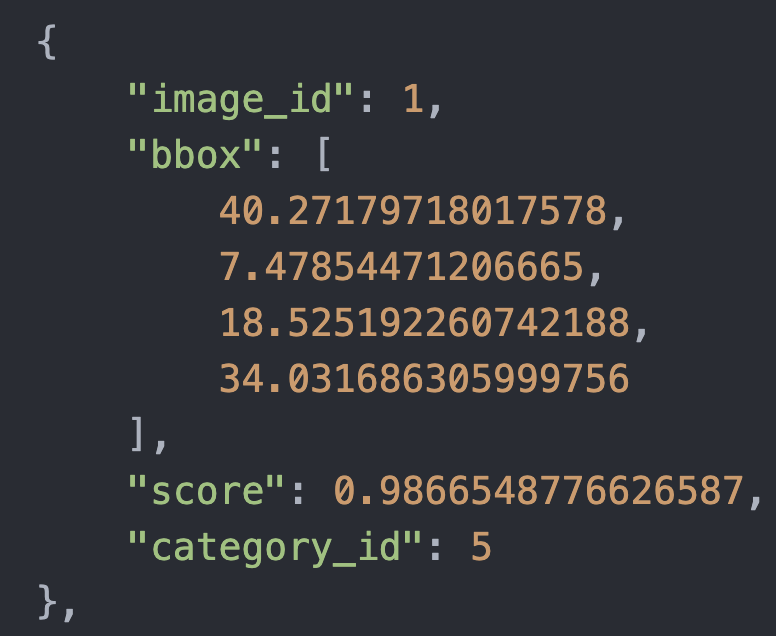

### See README in github to see that how to generate submission file
